In [4]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [3]:
# Define State

class BMIState(TypedDict):
    weight_kg : float
    height_m : float
    bmi : float

In [6]:
def calculate_bmi(state : BMIState) -> BMIState:
    weight = state['weight_kg']
    height = state['height_m']

    bmi = weight / (height**2)

    state['bmi'] = round(bmi,2)

    return state

In [ ]:
# define your graph
graph = StateGraph(BMIState)

# add nodes to your graph
graph.add_node('calculate_bmi', calculate_bmi)

# add edges to your graph
graph.add_edge(START,'calculate_bmi')
graph.add_edge('calculate_bmi',END)

# compile the graph
workflow = graph.compile()


In [8]:
# execute the graph

inital_state = {'weight_kg': 80, 'height_m': 1.73}
final_state = workflow.invoke(inital_state)

print(final_state)

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73}


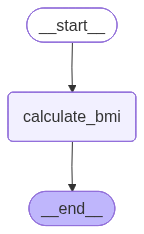

In [9]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())